In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df = pd.read_csv("Telecom_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# checking Null Values in the dataFrame.

In [3]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df.loc[df['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Converting the column type from object to float.
df["TotalCharges"]=df["TotalCharges"].astype(float)

In [11]:
df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Making DataFrame for the Nominal Data

In [14]:
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [15]:
df_visualization_nominal=df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']].copy()

In [16]:
df_visualization_nominal.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Visualization of the Data:

Male      3555
Female    3488
Name: gender, dtype: int64


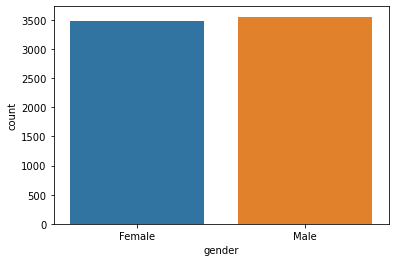

In [17]:
import seaborn as sns

ax = sns.countplot(x="gender", data=df_visualization_nominal)
print(df_visualization_nominal["gender"].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


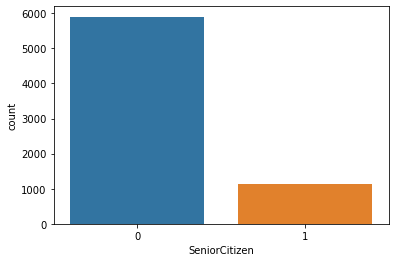

In [18]:
ax = sns.countplot(x="SeniorCitizen", data=df_visualization_nominal)
print(df_visualization_nominal["SeniorCitizen"].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


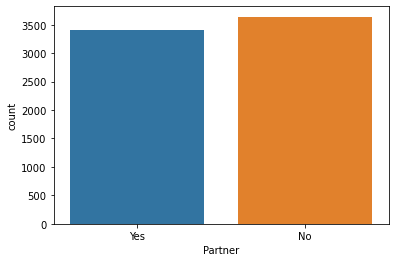

In [19]:
ax = sns.countplot(x="Partner", data=df_visualization_nominal)
print(df_visualization_nominal["Partner"].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


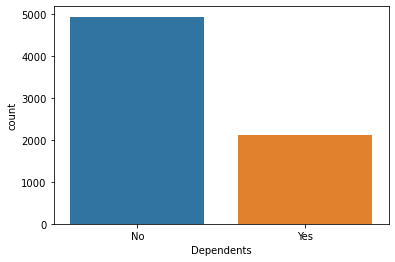

In [20]:
ax = sns.countplot(x="Dependents", data=df_visualization_nominal)
print(df_visualization_nominal["Dependents"].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


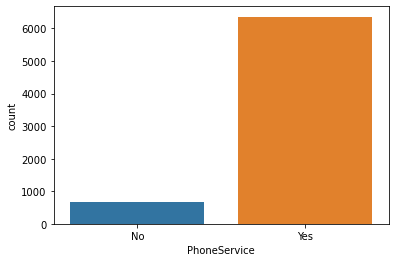

In [21]:
ax = sns.countplot(x="PhoneService", data=df_visualization_nominal)
print(df_visualization_nominal["PhoneService"].value_counts())



From the above observations the total number of customer using phone services is 6361 and total number of customer not using phone is 682.

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


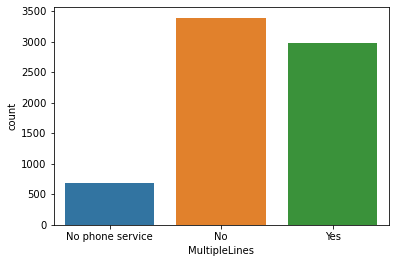

In [22]:
ax = sns.countplot(x="MultipleLines", data=df_visualization_nominal)
print(df_visualization_nominal["MultipleLines"].value_counts())

From the above observation total number of customer not using any phone services is 682. using no multiple services is 3390 and using multiple services is 2971.

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


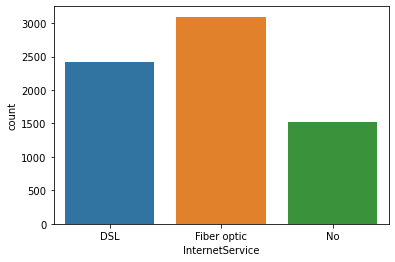

In [23]:
ax = sns.countplot(x="InternetService", data=df_visualization_nominal)
print(df_visualization_nominal["InternetService"].value_counts())

From the above observation total number of customer not using any internet services is 1526.fibre optics internet services is 3096 and using DSL internet services is 2421.

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


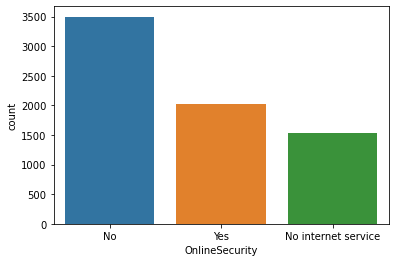

In [24]:
ax = sns.countplot(x="OnlineSecurity", data=df_visualization_nominal)
print(df_visualization_nominal["OnlineSecurity"].value_counts())

From the above observation total number of customer not using any internet services is 1526.using online security is 2019 and not using online security services is 3498.

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


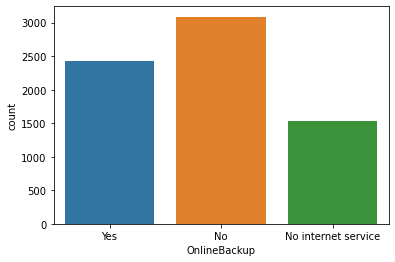

In [25]:
ax = sns.countplot(x="OnlineBackup", data=df_visualization_nominal)
print(df_visualization_nominal["OnlineBackup"].value_counts())

From the above observation total number of customer not using any internet services is 1526.using OnlineSecurity is 2019 and not using online security services is 3498.

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


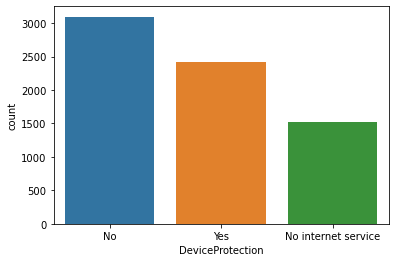

In [26]:
ax = sns.countplot(x="DeviceProtection", data=df_visualization_nominal)
print(df_visualization_nominal["DeviceProtection"].value_counts())

From the above observation total number of customer not using any internet services is 1526.using OnlineSecurity is 2785 and not using online security services is 2732.

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


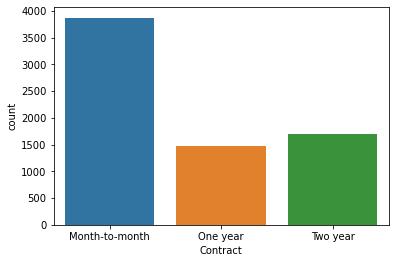

In [27]:
ax = sns.countplot(x="Contract", data=df_visualization_nominal)
print(df_visualization_nominal["Contract"].value_counts())

From the above observation total number of customer not using any internet services is 1526.using OnlineSecurity is 2785 and not using online security services is 2732

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


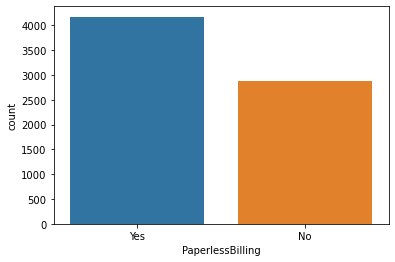

In [28]:
ax = sns.countplot(x="PaperlessBilling", data=df_visualization_nominal)
print(df_visualization_nominal["PaperlessBilling"].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


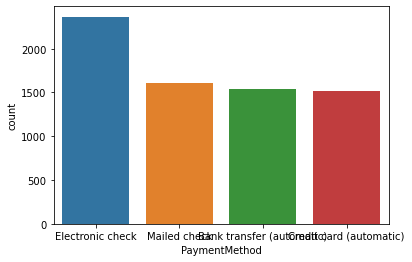

In [29]:
ax = sns.countplot(x="PaymentMethod", data=df_visualization_nominal)
print(df_visualization_nominal["PaymentMethod"].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


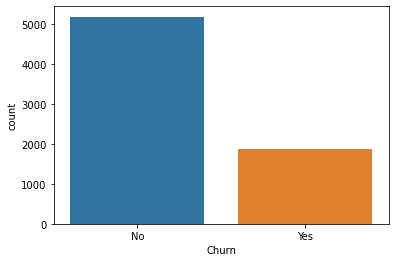

In [30]:
ax = sns.countplot(x="Churn", data=df_visualization_nominal)
print(df_visualization_nominal["Churn"].value_counts())

# Making dataframe of the ordinal data.

In [31]:
df_visualization_ordinal=df[["customerID","tenure"]]

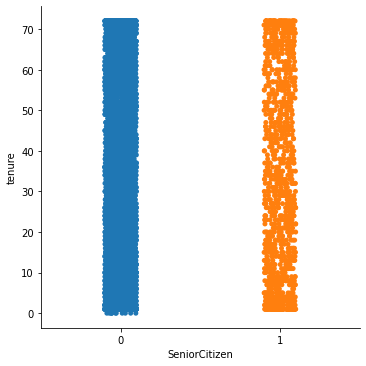

In [32]:
sns.catplot(x="SeniorCitizen",y="tenure", data=df)

In [33]:
df_visualization_continuous=df[["MonthlyCharges","TotalCharges"]].copy()

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

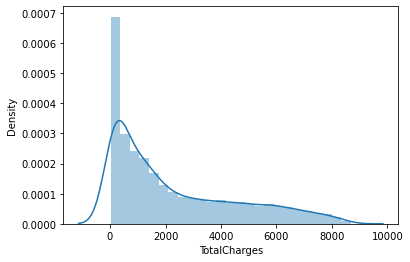

In [34]:
import seaborn as sns
sns.distplot(df_visualization_continuous['TotalCharges'], kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

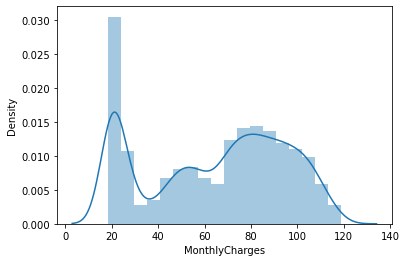

In [35]:
sns.distplot(df_visualization_continuous['MonthlyCharges'], kde=True)

# Encoding of DataFrame:

In [36]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [37]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [38]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [39]:
df.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [63]:
# There is no null values and data types are in either int64 or float64.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


<AxesSubplot:>

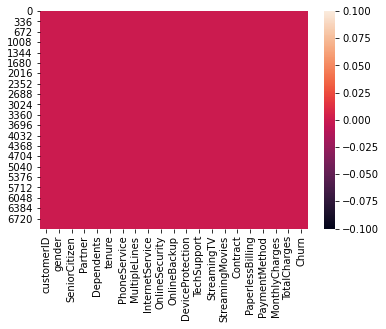

In [64]:
import seaborn as sns
sns.heatmap(df.isnull())

# EDA:
ScatterPlot

<AxesSubplot:xlabel='customerID', ylabel='Churn'>

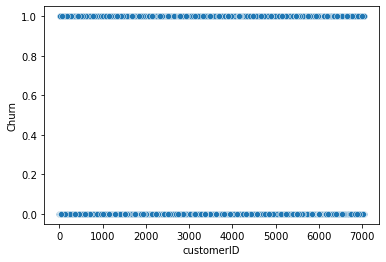

In [68]:
import seaborn as sns
sns.scatterplot(x='customerID',y='Churn',data=df)

<AxesSubplot:xlabel='gender', ylabel='Churn'>

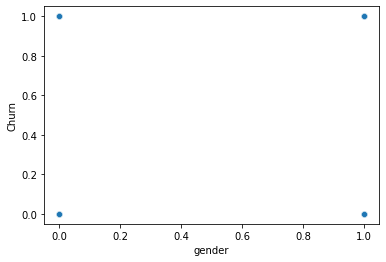

In [69]:
sns.scatterplot(x='gender',y='Churn',data=df)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

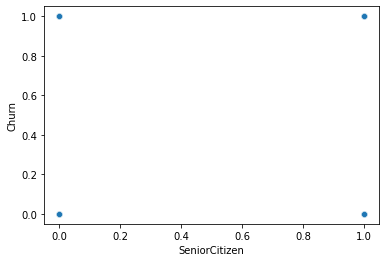

In [70]:
sns.scatterplot(x='SeniorCitizen',y='Churn',data=df)

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

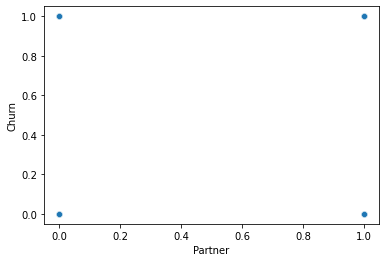

In [71]:
sns.scatterplot(x='Partner',y='Churn',data=df)

<AxesSubplot:xlabel='Dependents', ylabel='Churn'>

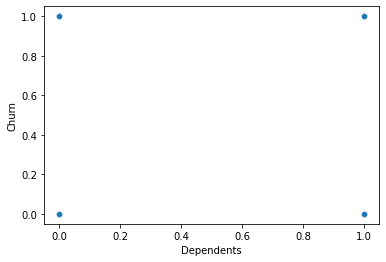

In [72]:
sns.scatterplot(x='Dependents',y='Churn',data=df)

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

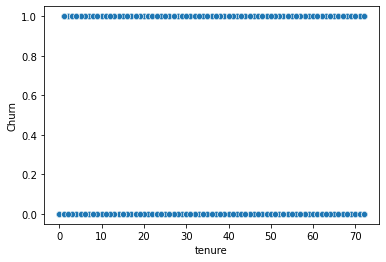

In [73]:
sns.scatterplot(x='tenure',y='Churn',data=df)

<AxesSubplot:xlabel='PhoneService', ylabel='Churn'>

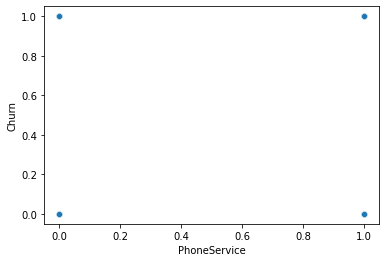

In [74]:
sns.scatterplot(x='PhoneService',y='Churn',data=df)

<AxesSubplot:xlabel='MultipleLines', ylabel='Churn'>

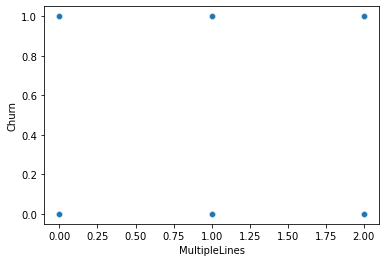

In [75]:
sns.scatterplot(x='MultipleLines',y='Churn',data=df)

<AxesSubplot:xlabel='InternetService', ylabel='Churn'>

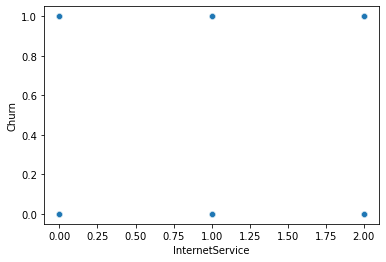

In [76]:
sns.scatterplot(x='InternetService',y='Churn',data=df)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Churn'>

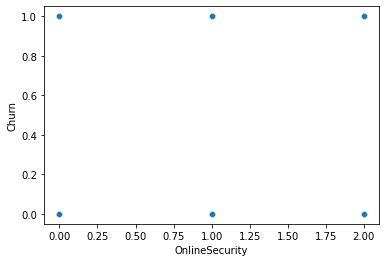

In [77]:
sns.scatterplot(x='OnlineSecurity',y='Churn',data=df)

<AxesSubplot:xlabel='OnlineBackup', ylabel='Churn'>

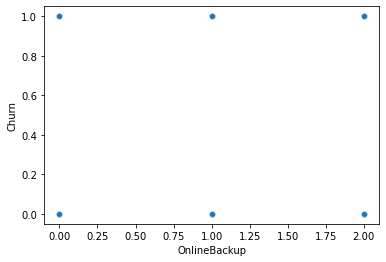

In [78]:
sns.scatterplot(x='OnlineBackup',y='Churn',data=df)

<AxesSubplot:xlabel='DeviceProtection', ylabel='Churn'>

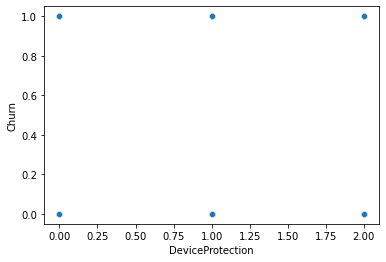

In [79]:
sns.scatterplot(x='DeviceProtection',y='Churn',data=df)

<AxesSubplot:xlabel='TechSupport', ylabel='Churn'>

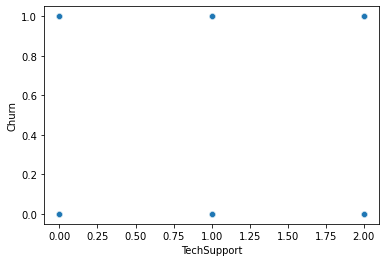

In [80]:
sns.scatterplot(x='TechSupport',y='Churn',data=df)

<AxesSubplot:xlabel='StreamingTV', ylabel='Churn'>

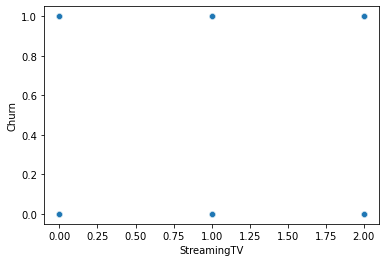

In [81]:
sns.scatterplot(x='StreamingTV',y='Churn',data=df)

<AxesSubplot:xlabel='StreamingMovies', ylabel='Churn'>

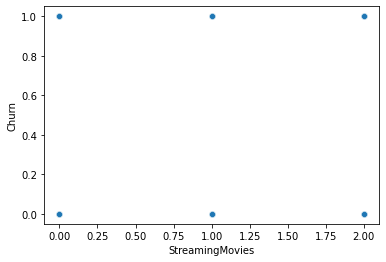

In [82]:
sns.scatterplot(x='StreamingMovies',y='Churn',data=df)

<AxesSubplot:xlabel='Contract', ylabel='Churn'>

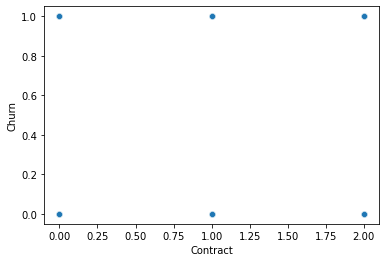

In [83]:
sns.scatterplot(x='Contract',y='Churn',data=df)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Churn'>

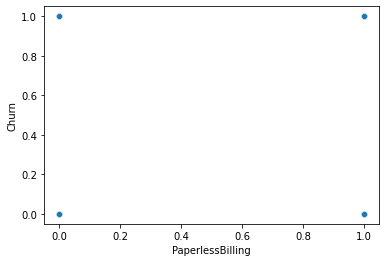

In [84]:
sns.scatterplot(x='PaperlessBilling',y='Churn',data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn'>

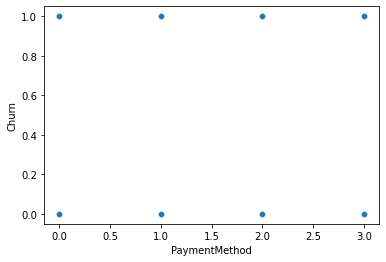

In [85]:
sns.scatterplot(x='PaymentMethod',y='Churn',data=df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

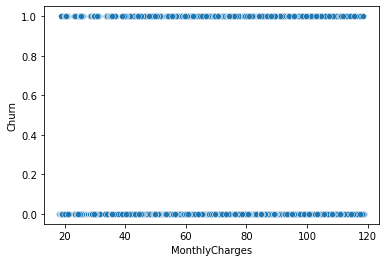

In [86]:
sns.scatterplot(x='MonthlyCharges',y='Churn',data=df)

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

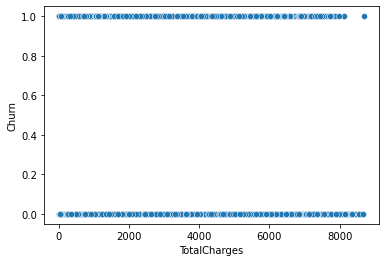

In [87]:
sns.scatterplot(x='TotalCharges',y='Churn',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Churn'>

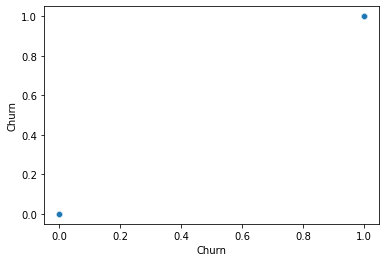

In [88]:
sns.scatterplot(x='Churn',y='Churn',data=df)

In [89]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,...,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,-0.000270,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,...,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,...,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,...,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,...,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,...,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,...,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,...,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,...,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,...,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309


In [90]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

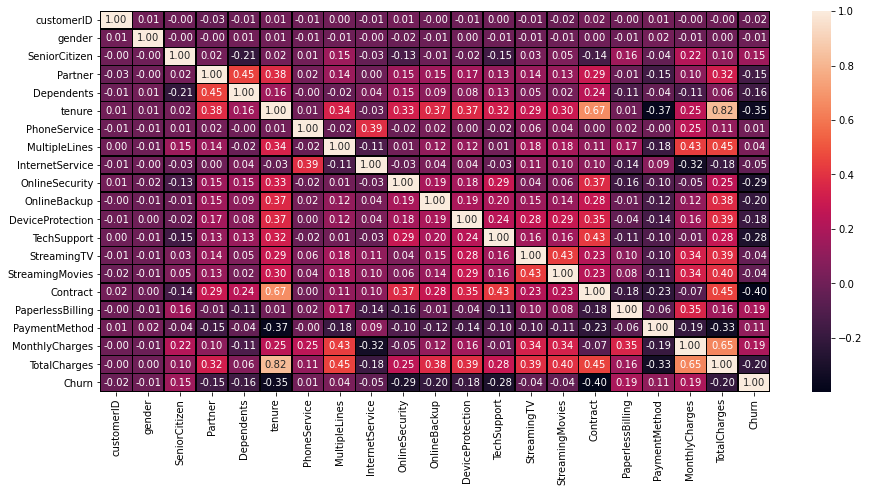

In [91]:
#Correlation using heatmap

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor="black", fmt='.2f')

In [92]:
#Describe Dataset
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


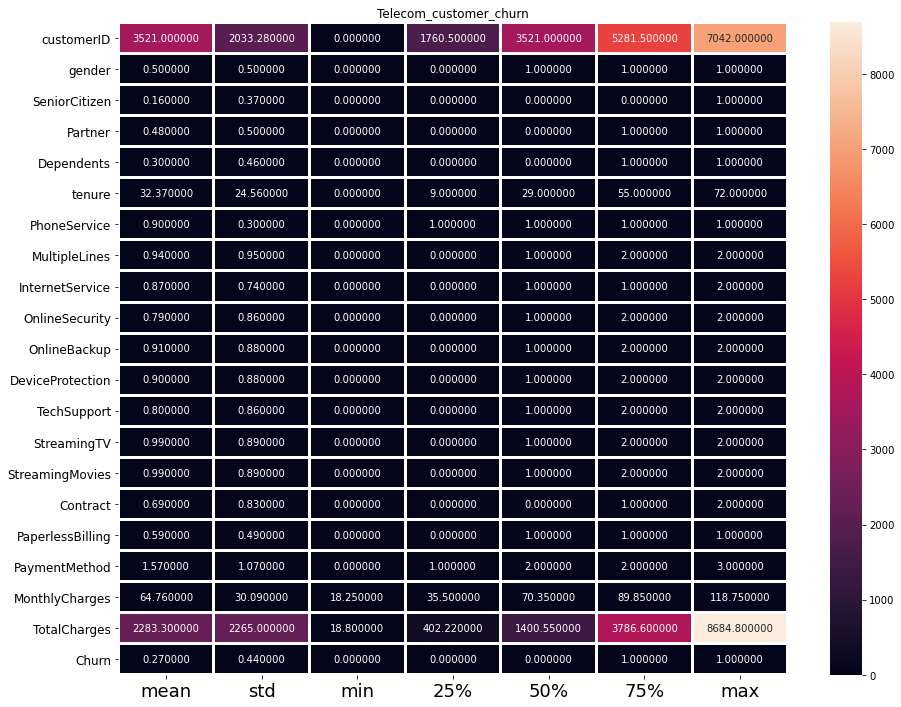

In [93]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Telecom_customer_churn")
plt.show()

all stats are above

In [94]:
#To check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   float64
 1   gender            7043 non-null   float64
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   float64
 4   Dependents        7043 non-null   float64
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   float64
 7   MultipleLines     7043 non-null   float64
 8   InternetService   7043 non-null   float64
 9   OnlineSecurity    7043 non-null   float64
 10  OnlineBackup      7043 non-null   float64
 11  DeviceProtection  7043 non-null   float64
 12  TechSupport       7043 non-null   float64
 13  StreamingTV       7043 non-null   float64
 14  StreamingMovies   7043 non-null   float64
 15  Contract          7043 non-null   float64
 16  PaperlessBilling  7043 non-null   float64


There is no null values and string or char format data. and we can see storage memory also.we can check outliers.

<AxesSubplot:>

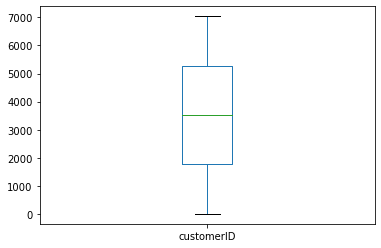

In [97]:
# we are checking outliers here.
df['customerID'].plot.box()

<AxesSubplot:>

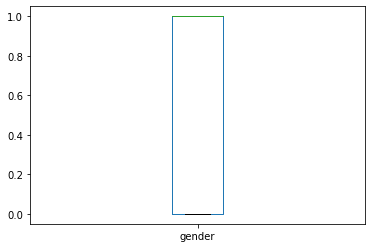

In [98]:
df['gender'].plot.box()

<AxesSubplot:>

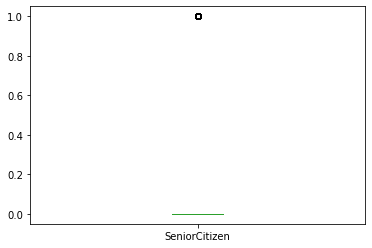

In [99]:
df['SeniorCitizen'].plot.box()

<AxesSubplot:>

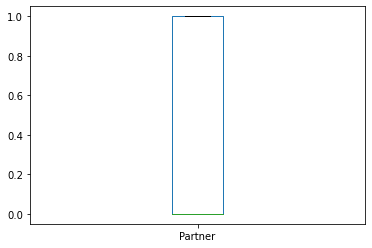

In [100]:
df['Partner'].plot.box()

<AxesSubplot:>

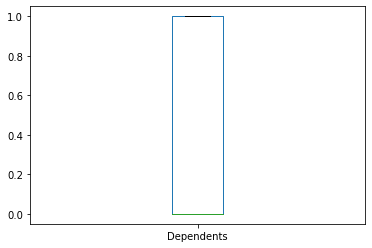

In [101]:
df['Dependents'].plot.box()

<AxesSubplot:>

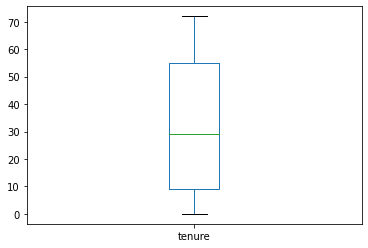

In [102]:
df['tenure'].plot.box()

<AxesSubplot:>

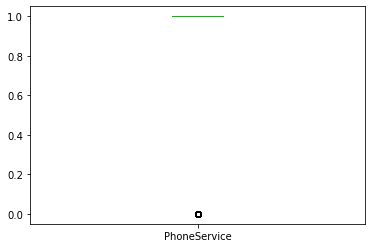

In [103]:
df['PhoneService'].plot.box()

<AxesSubplot:>

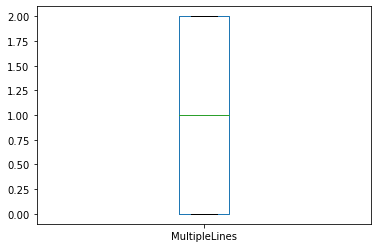

In [104]:
df['MultipleLines'].plot.box()

<AxesSubplot:>

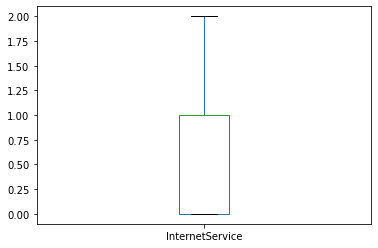

In [105]:
df['InternetService'].plot.box()

<AxesSubplot:>

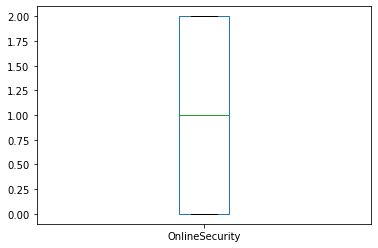

In [106]:
df['OnlineSecurity'].plot.box()

<AxesSubplot:>

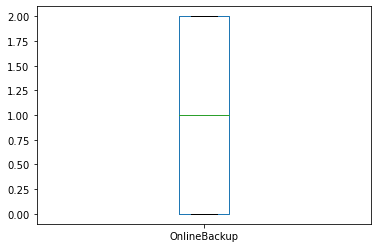

In [107]:
df['OnlineBackup'].plot.box()

<AxesSubplot:>

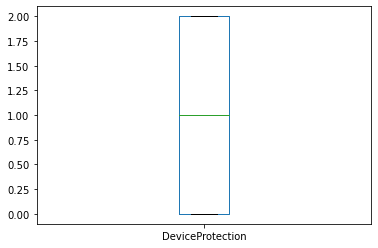

In [108]:
df['DeviceProtection'].plot.box()

<AxesSubplot:>

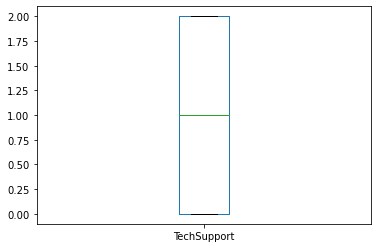

In [109]:
df['TechSupport'].plot.box()

<AxesSubplot:>

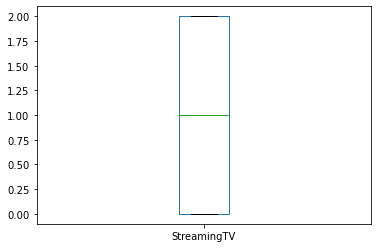

In [110]:
df['StreamingTV'].plot.box()

<AxesSubplot:>

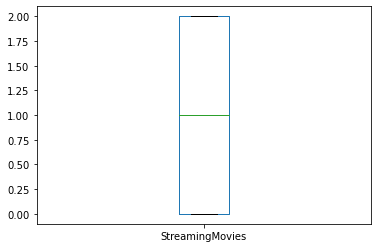

In [111]:
df['StreamingMovies'].plot.box()

<AxesSubplot:>

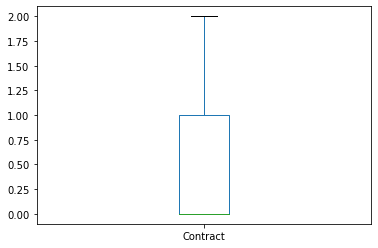

In [112]:
df['Contract'].plot.box()

<AxesSubplot:>

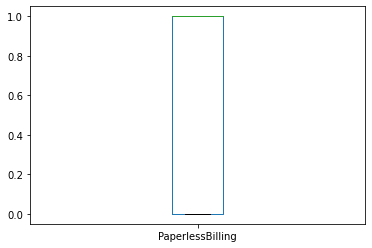

In [113]:
df['PaperlessBilling'].plot.box()

<AxesSubplot:>

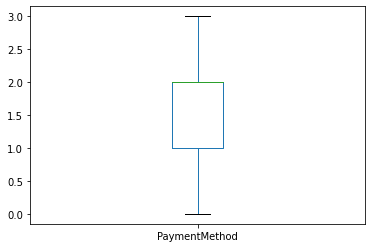

In [114]:
df['PaymentMethod'].plot.box()

<AxesSubplot:>

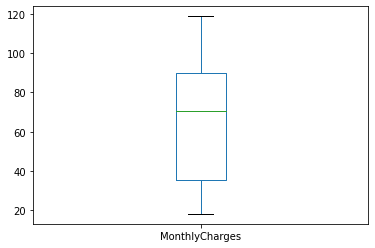

In [115]:
df['MonthlyCharges'].plot.box()

<AxesSubplot:>

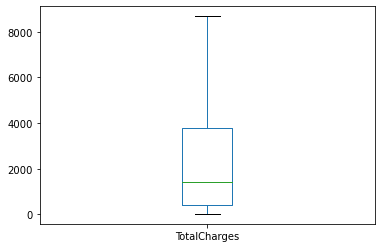

In [116]:
df['TotalCharges'].plot.box()

<AxesSubplot:>

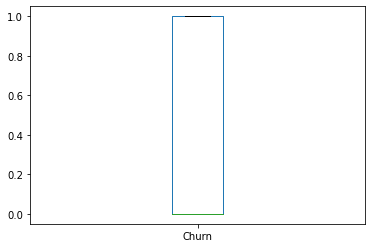

In [117]:
df['Churn'].plot.box()

Here check the outliers. data are almost normal there are only 2 columns are in outliers.

# Skewness:-

In [118]:
df.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

# Normal Distribution Curve

<AxesSubplot:xlabel='customerID', ylabel='Density'>

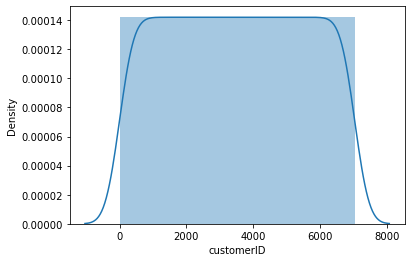

In [122]:
sns.distplot(df['customerID'])

<AxesSubplot:xlabel='gender', ylabel='Density'>

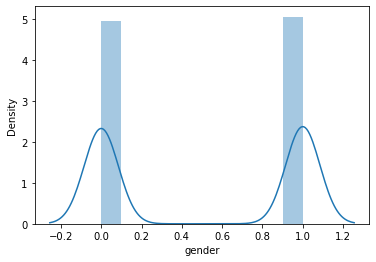

In [123]:
sns.distplot(df['gender'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

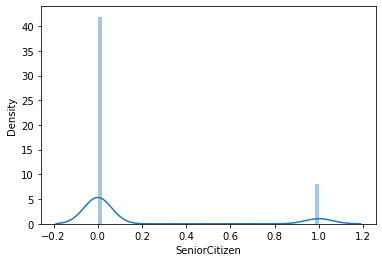

In [124]:
sns.distplot(df['SeniorCitizen'])

<AxesSubplot:xlabel='Partner', ylabel='Density'>

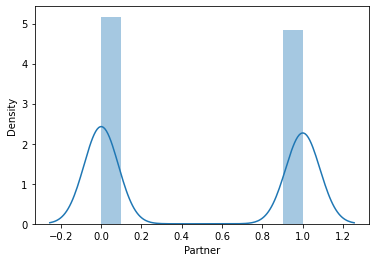

In [125]:
sns.distplot(df['Partner'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

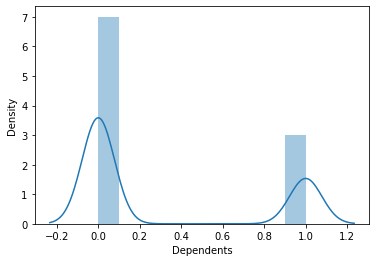

In [126]:
sns.distplot(df['Dependents'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

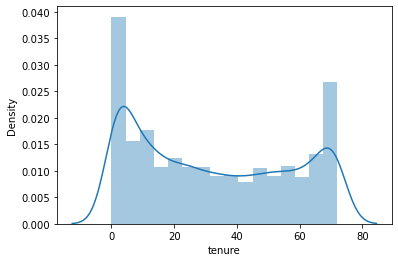

In [127]:
sns.distplot(df['tenure'])

<AxesSubplot:xlabel='PhoneService', ylabel='Density'>

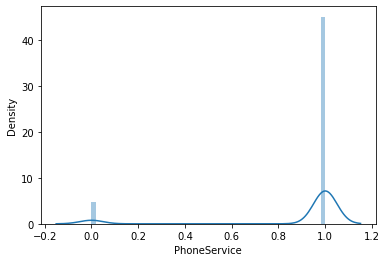

In [128]:
sns.distplot(df['PhoneService'])

<AxesSubplot:xlabel='MultipleLines', ylabel='Density'>

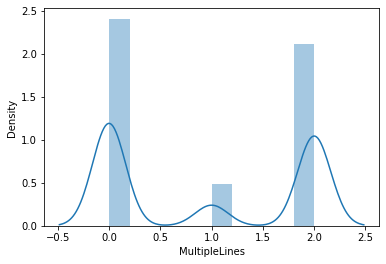

In [129]:
sns.distplot(df['MultipleLines'])

<AxesSubplot:xlabel='InternetService', ylabel='Density'>

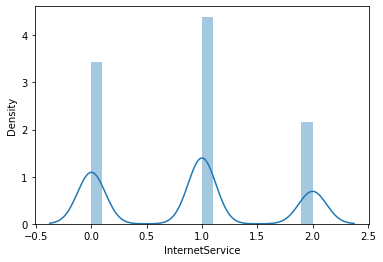

In [130]:
sns.distplot(df['InternetService'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Density'>

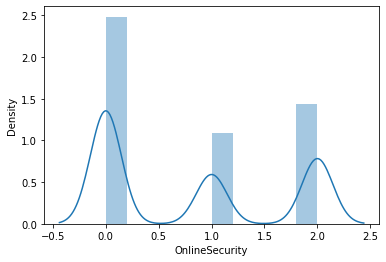

In [131]:
sns.distplot(df['OnlineSecurity'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='Density'>

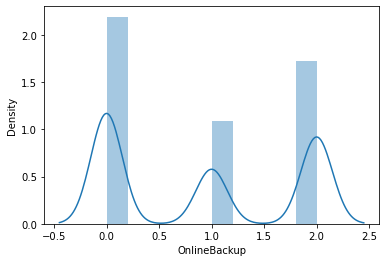

In [132]:
sns.distplot(df['OnlineBackup'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='Density'>

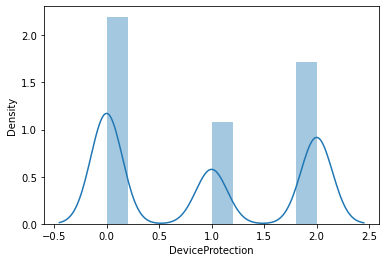

In [133]:
sns.distplot(df['DeviceProtection'])

<AxesSubplot:xlabel='TechSupport', ylabel='Density'>

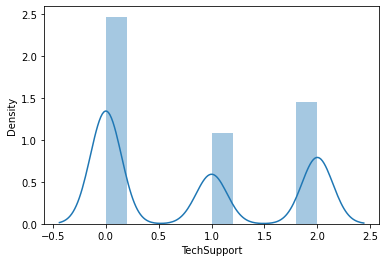

In [134]:
sns.distplot(df['TechSupport'])

<AxesSubplot:xlabel='StreamingTV', ylabel='Density'>

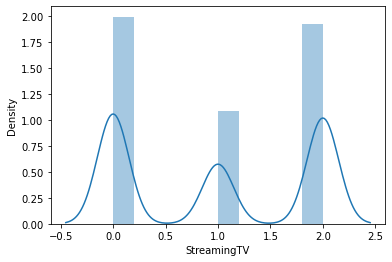

In [135]:
sns.distplot(df['StreamingTV'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='Density'>

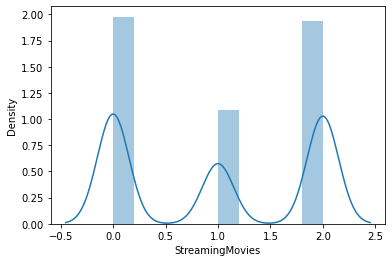

In [136]:
sns.distplot(df['StreamingMovies'])

<AxesSubplot:xlabel='Contract', ylabel='Density'>

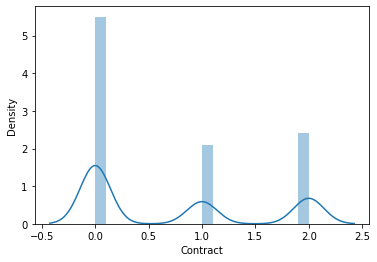

In [137]:
sns.distplot(df['Contract'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Density'>

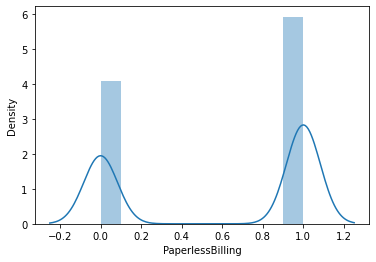

In [138]:
sns.distplot(df['PaperlessBilling'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='Density'>

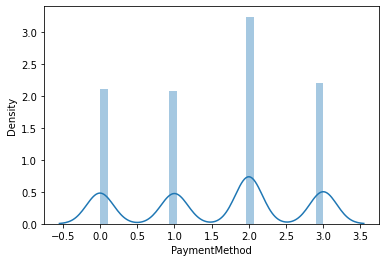

In [139]:
sns.distplot(df['PaymentMethod'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

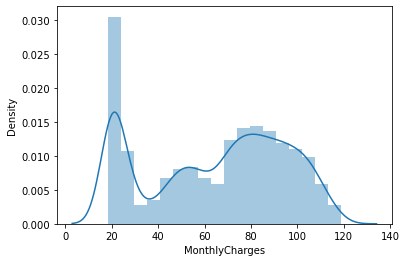

In [140]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

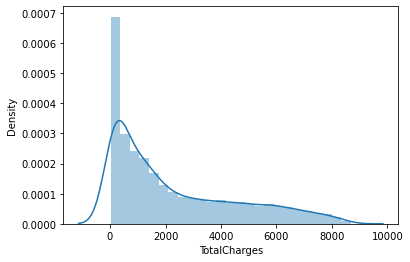

In [141]:
sns.distplot(df['TotalCharges'])

<AxesSubplot:xlabel='Churn', ylabel='Density'>

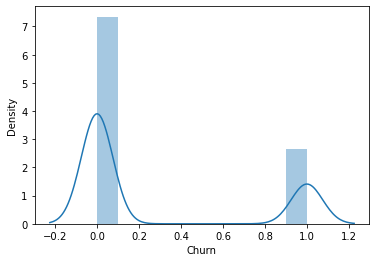

In [142]:
sns.distplot(df['Churn'])

# The normal distribution shows that the data is skewed.

# Data Cleaning:

In [143]:
#SP=skewed point.
SP = pd.DataFrame([["-0.038492","StreamingMovies","No","Alot"],["-0.036581","StreamingTV","No","Alot"],["-0.047291","InternetService","No","Alot"],["-0.008612","gender","No","Alot"],["-0.017447","customerID","No","Alot"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])
SP

,Correlation with Target,Column Name,Normalised,Outliers
0,-0.038492,StreamingMovies,No,Alot
1,-0.036581,StreamingTV,No,Alot
2,-0.047291,InternetService,No,Alot
3,-0.008612,gender,No,Alot
4,-0.017447,customerID,No,Alot


# Removing Outliers:

# Z-Score Technique:

In [146]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))

In [147]:
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [148]:
df1=df[(z<3).all(axis=1)]
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [151]:
# Here we can check shape both of the dataset.
df.shape,df1.shape

((7043, 21), (6361, 21))

# Percentage loss of data while removing ourliers

In [152]:
percentage_loss=((7043-6361)/7043)*100
print(percentage_loss)

9.683373562402386


In [156]:
x = df1[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]
y = df1['Churn']

In [157]:
# Here we can check our seperation of our data in 2 variable x and y.
x.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15


In [158]:
y.head(2)

1    0.0
2    1.0
Name: Churn, dtype: float64

# Transforming data to remove skewness

In [159]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.30313384,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.373024  ,  0.22245685],
       [-0.35817008,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.47442923, -1.40089107],
       [ 1.35238168, -1.00741628, -0.44159123, ...,  0.41100623,
         0.08479714, -1.26553748],
       ...,
       [-0.92323829, -1.00741628, -0.44159123, ..., -0.52011602,
         1.20975572,  1.5271771 ],
       [ 1.12752839,  0.99263832,  2.26453771, ...,  1.31916733,
         0.21003559, -0.94236139],
       [-0.53290672,  0.99263832, -0.44159123, ..., -1.48777569,
         1.29661682,  1.44500255]])

In [160]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.30313384,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.373024  ,  0.22245685],
       [-0.35817008,  0.99263832, -0.44159123, ...,  1.31916733,
        -0.47442923, -1.40089107],
       [ 1.35238168, -1.00741628, -0.44159123, ...,  0.41100623,
         0.08479714, -1.26553748],
       ...,
       [-0.92323829, -1.00741628, -0.44159123, ..., -0.52011602,
         1.20975572,  1.5271771 ],
       [ 1.12752839,  0.99263832,  2.26453771, ...,  1.31916733,
         0.21003559, -0.94236139],
       [-0.53290672,  0.99263832, -0.44159123, ..., -1.48777569,
         1.29661682,  1.44500255]])

# Since the outcome has only two variable we will use binary classification model.

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

# Splitting the dataframe:

In [163]:
# Here we are splitting our data in training and testing.
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", accuracy_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", accuracy_score(y_test,pred_test)*100)
        print("\n")

At random state 3  The model performs very well
At random_state:- 3
Training r2_score is:- 80.75864779874213
Testing r2_score is:- 80.9897879025923


At random state 11  The model performs very well
At random_state:- 11
Training r2_score is:- 80.73899371069182
Testing r2_score is:- 81.30400628436763


At random state 13  The model performs very well
At random_state:- 13
Training r2_score is:- 80.85691823899371
Testing r2_score is:- 80.67556952081696


At random state 16  The model performs very well
At random_state:- 16
Training r2_score is:- 80.8372641509434
Testing r2_score is:- 80.59701492537313


At random state 17  The model performs very well
At random_state:- 17
Training r2_score is:- 80.6996855345912
Testing r2_score is:- 80.75412411626081


At random state 18  The model performs very well
At random_state:- 18
Training r2_score is:- 80.68003144654088
Testing r2_score is:- 80.9897879025923


At random state 20  The model performs very well
At random_state:- 20
Training r2_score 

In [164]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
from sklearn.svm import SVR


knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
print('dtc score:',knr.score(x_train,y_train))

knrpredict = knr.predict(x_test)
print('dtc r2_score:', r2_score(y_test,knrpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,knrpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,knrpredict)))

dtc score: 0.42070688667456213
dtc r2_score: 0.17160658722586997
Mean squared error of dtc = 0.16395915161036922
Root Mean squared error of dtc = 0.40491869753120713


In [165]:
dtc = DecisionTreeRegressor()
dtc.fit(x_train,y_train)
print('dtc score:',dtc.score(x_train,y_train))

dtcpredict = dtc.predict(x_test)
print('dtc r2_score:', r2_score(y_test,dtcpredict))

print("Mean squared error of dtc =",mean_squared_error(y_test,dtcpredict))
print("Root Mean squared error of dtc =",np.sqrt(mean_squared_error(y_test,dtcpredict)))

dtc score: 1.0
dtc r2_score: -0.2422726053962374
Mean squared error of dtc = 0.24587588373919875
Root Mean squared error of dtc = 0.4958587336522356


In [166]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,random_state=42)
#RandomForestClassifier(100)----Default
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

print(predrf)

print('Rf score:',rf.score(x_train,y_train))

print('rf r2_score:', r2_score(y_test,predrf))

[0.32 0.   0.09 ... 0.5  0.07 0.09]
Rf score: 0.8976617741327468
rf r2_score: 0.28278522270235884


In [167]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=50,random_state=42)

ada.fit(x_train,y_train)
predata=ada.predict(x_test)

print(predata)

print('Rf score: ',ada.score(x_train,y_train))
print('ADA r2_score:', r2_score(y_test,predata))

[0.45757576 0.08247423 0.28832117 ... 0.27710843 0.18436874 0.2192691 ]
Rf score:  0.2767190763790075
ADA r2_score: 0.25501400426005383


In [168]:
from sklearn.ensemble import GradientBoostingRegressor
grid = GradientBoostingRegressor()

grid.fit(x_train,y_train)
predgrid=ada.predict(x_test)

print(predgrid)

print('Rf score: ',grid.score(x_train,y_train))

print('ADA r2_score:', r2_score(y_test,predgrid))

[0.45757576 0.08247423 0.28832117 ... 0.27710843 0.18436874 0.2192691 ]
Rf score:  0.39330479426669396
ADA r2_score: 0.25501400426005383


In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=141)

In [170]:
# Here classification report is showing
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

         0.0       0.73      0.77      0.75       940
         1.0       0.23      0.19      0.21       333

    accuracy                           0.62      1273
   macro avg       0.48      0.48      0.48      1273
weighted avg       0.60      0.62      0.61      1273



# Cross validation score for logistic Regression:

In [171]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = accuracy_score(y_test,pred_lr)
for j in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=j)
    lsc = lsscore.mean()
    print("At cv:-",j)
    print("Cross Validation Score is:-",lsc*100 )
    print("Accuracy_score is:-",lss*100)
    print("\n")

At cv:- 2
Cross Validation Score is:- 80.71056232069738
Accuracy_score is:- 80.75412411626081


At cv:- 3
Cross Validation Score is:- 80.56911418904694
Accuracy_score is:- 80.75412411626081


At cv:- 4
Cross Validation Score is:- 80.71046254679428
Accuracy_score is:- 80.75412411626081


At cv:- 5
Cross Validation Score is:- 80.50607192438996
Accuracy_score is:- 80.75412411626081


At cv:- 6
Cross Validation Score is:- 80.55327832411572
Accuracy_score is:- 80.75412411626081


At cv:- 7
Cross Validation Score is:- 80.6320405482965
Accuracy_score is:- 80.75412411626081


At cv:- 8
Cross Validation Score is:- 80.63197275686609
Accuracy_score is:- 80.75412411626081


At cv:- 9
Cross Validation Score is:- 80.55349646660335
Accuracy_score is:- 80.75412411626081




In [172]:
lsscore_selected = cross_val_score(lr,x,y,cv=4).mean()
print("The cv score is: ", lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.8071046254679427 
The accuracy score is:  0.8075412411626081


# The Model with the outliers:

# AUC ROC Curve:

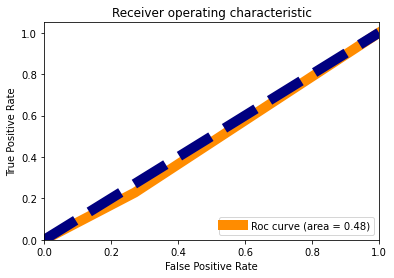

In [173]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_test, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=10, label='Roc curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy',lw=10, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Since the model without outliers performs well!! We will select that dataframe.

# Model Saving:

In [174]:
import pickle
filename = 'Telecom_customer_churn'
pickle.dump(lr, open(filename, 'wb'))

# Conclusion:

In [175]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1268,0.0,0.0
1269,0.0,0.0
1270,0.0,0.0
1271,0.0,0.0
